<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/2-Python/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot
import matplotlib.dates

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/2-Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo.drop(['Unnamed: 0'], inplace=True, axis=1)


print ( 'dimensione dataset iniziale: ' + str(meteo.shape) )


meteo = meteo.dropna()
meteo.isna().sum().sum()

print ( 'dimensione dataset senza NaN: ' + str(meteo.shape) )

newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)

cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
meteo.head()

dimensione dataset iniziale: (237629, 13)
dimensione dataset senza NaN: (21799, 13)


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,Date
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,2010-01-01
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,2010-01-01
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,2010-01-01
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,2010-01-02
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,2010-01-02


## **Analisi descrittiva e comprensione del DataSet**

In [ ]:
# Check the overall info
meteo.info()

In [ ]:
# Check the numerical data stats
meteo.describe()

In [ ]:
meteo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(meteo['mean_air_temp_perday'])
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo['Date'], meteo['mean_air_temp_perday'])
plt.grid()
plt.show()

In [ ]:
#Segment column
plt.figure(figsize= (8,4))
meteo["sourceID"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the data per weather station\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("sourceID", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

## **Creazione dataframe con medie giornaliere e mensili**

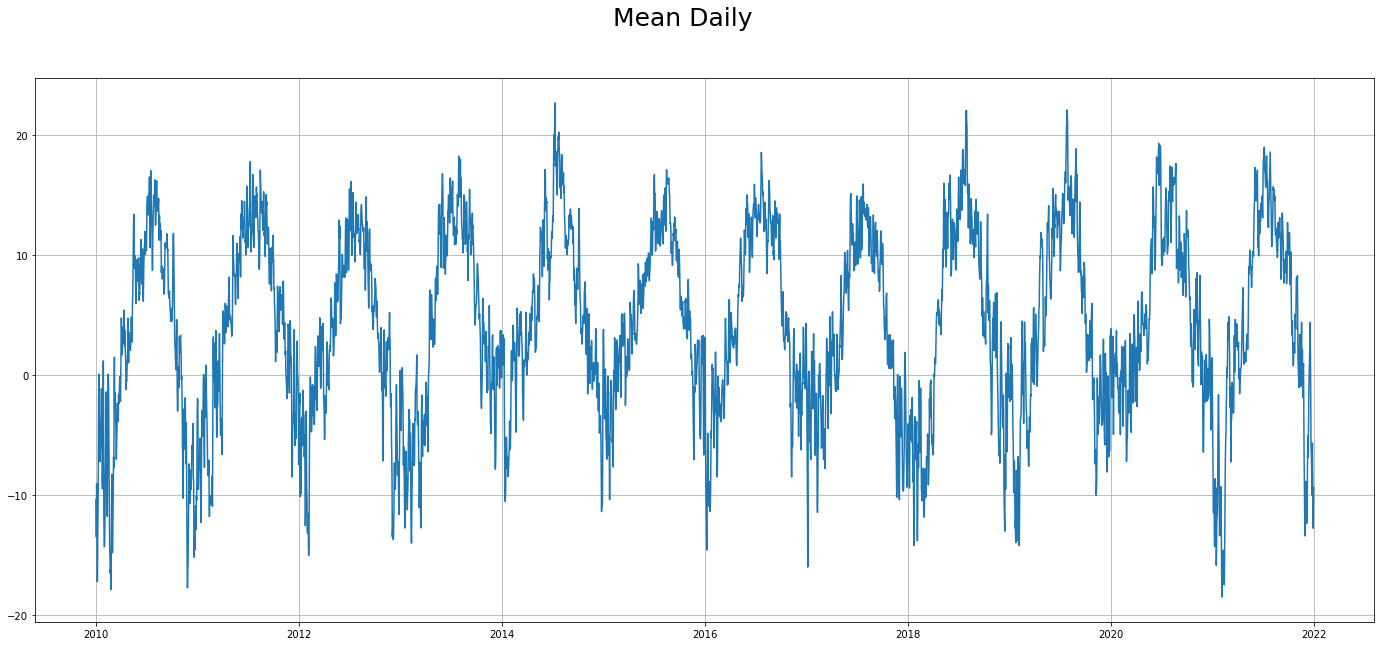

In [3]:
date = meteo['Date']

date = pd.PeriodIndex(date, freq="D").drop_duplicates()


temperatury_mont = []
date_ = []


for y in date:
     
  tmp = meteo[meteo['Date'] == str(y)]
  tmp = tmp['mean_air_temp_perday'].mean()
  temperatury_mont.append(tmp)
  date_.append(y)


#years = pd.PeriodIndex(date_, freq="Y").drop_duplicates()


df_daily = pd.DataFrame({'Temperatury' : temperatury_mont , 'Date' : date_})

df_daily['Date'] = df_daily['Date'].astype(str)
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
#print(df_series['Date'].dtypes)


df_daily.head()

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(10)
f.suptitle('Mean Daily', fontsize=25)

plt.plot(df_daily['Date'], df_daily['Temperatury'])
plt.grid()
plt.show()



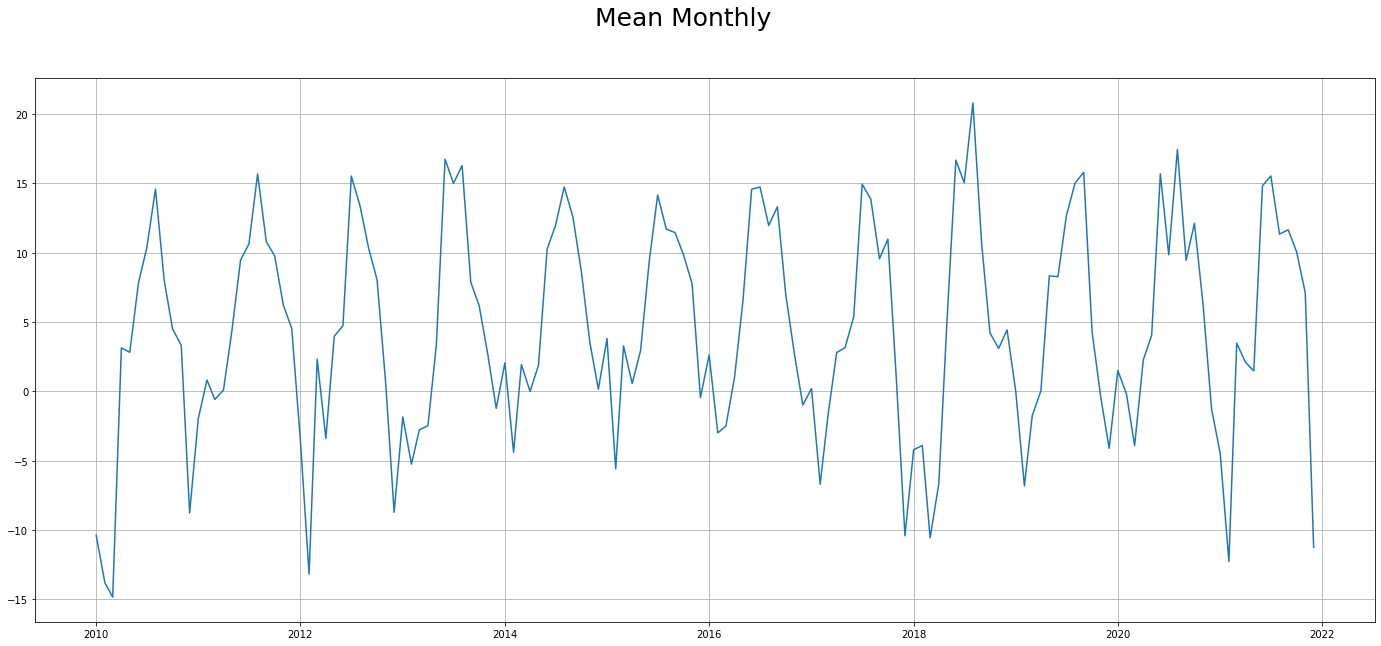

In [4]:
date = meteo['Date']

date = pd.PeriodIndex(date, freq="M").drop_duplicates()


temperatury_mont = []
date_ = []


for y in date:
     
  tmp = meteo[meteo['Date'] == str(y)]
  tmp = tmp['mean_air_temp_perday'].mean()
  temperatury_mont.append(tmp)
  date_.append(y)


#years = pd.PeriodIndex(date_, freq="Y").drop_duplicates()


df_monthly = pd.DataFrame({'Temperatury' : temperatury_mont , 'Date' : date_})

df_monthly['Date'] = df_monthly['Date'].astype(str)
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])
#print(df_series['Date'].dtypes)


df_monthly.head()

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(10)
f.suptitle('Mean Monthly', fontsize=25)

plt.plot(df_monthly['Date'], df_monthly['Temperatury'])
plt.grid()
plt.show()





## Decomposizoine della serie temporale in tre componenti: tendenza, stagionalità e rumore casuale.

Studio sulla serie temporale della media giornaliera, scomposizione della serie con frequenza di 365 giorni

Utilizzo metodo STL della libreria statsmodels.tsa.seasonal


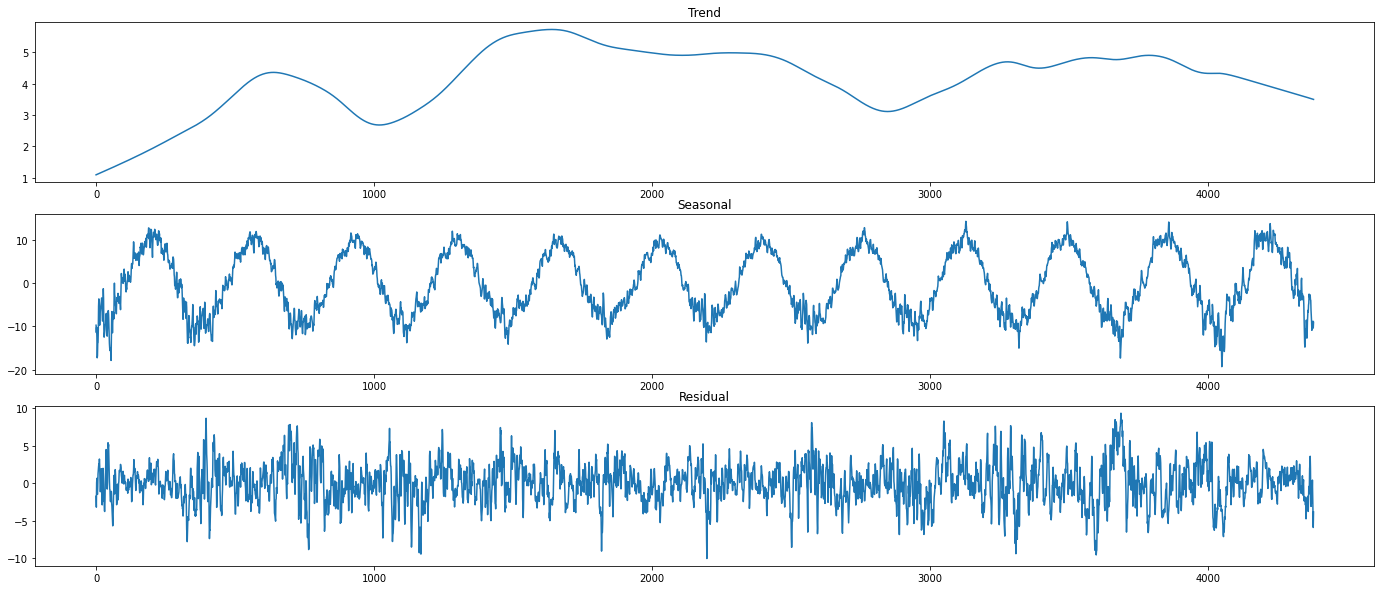

In [5]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_daily['Temperatury'], period=365)

stl_fit = stl.fit()

fig, ax = plt.subplots(3, figsize=(24,10))
ax[0].plot(stl_fit.trend)
ax[0].set_title('Trend')
ax[1].plot(stl_fit.seasonal)
ax[1].set_title('Seasonal')
ax[2].plot(stl_fit.resid)
ax[2].set_title('Residual')
plt.show()



<ipython-input-40-7ecad9f887e3>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_daily['Temperatury'], model='additive',freq = 365)


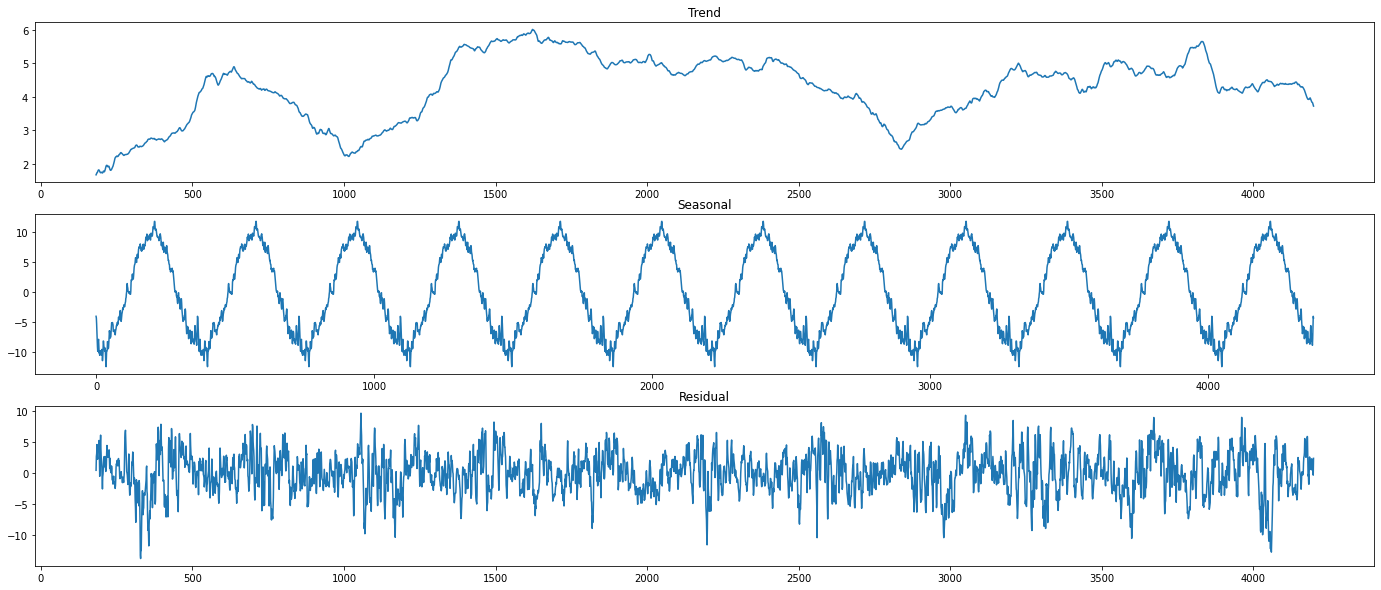

In [40]:
result = seasonal_decompose(df_daily['Temperatury'], model='additive',freq = 365)

fig, ax = plt.subplots(3, figsize=(24,10))
ax[0].plot(result.trend)
ax[0].set_title('Trend')
ax[1].plot(result.seasonal)
ax[1].set_title('Seasonal')
ax[2].plot(result.resid)
ax[2].set_title('Residual')
plt.show()


Applico la decomposizione sul dataset monthly

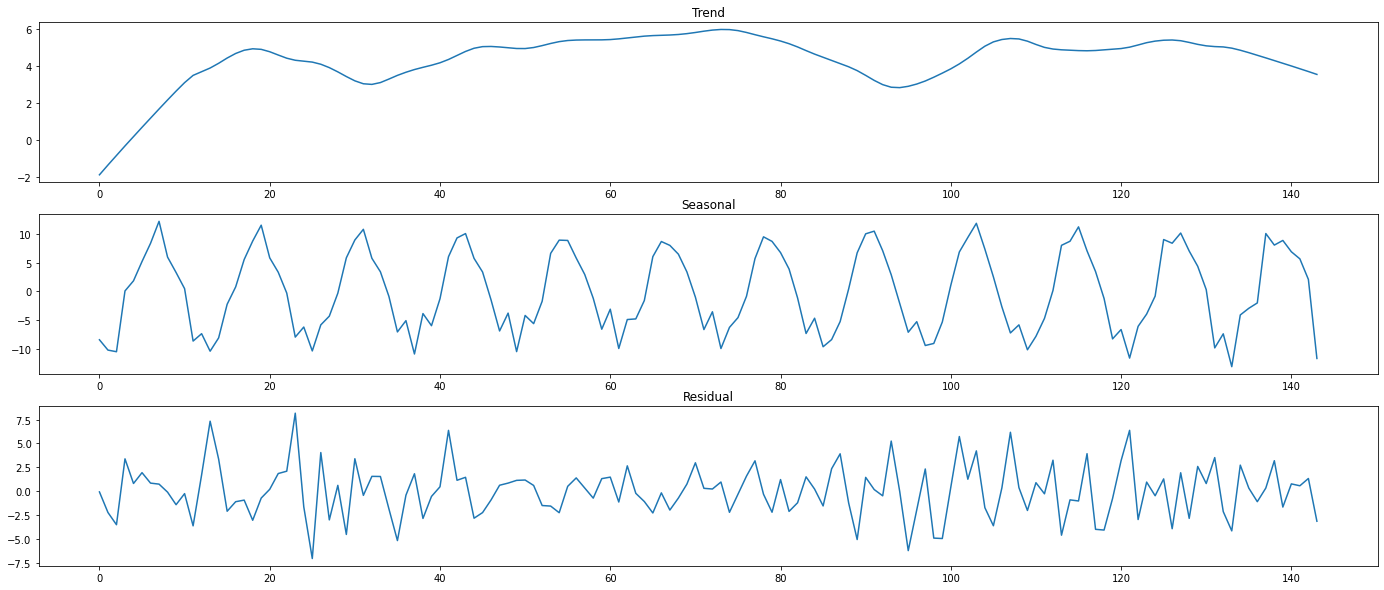

In [41]:

stl = STL(df_monthly['Temperatury'], period=12)

stl_fit = stl.fit()

fig, ax = plt.subplots(3, figsize=(24,10))
ax[0].plot(stl_fit.trend)
ax[0].set_title('Trend')
ax[1].plot(stl_fit.seasonal)
ax[1].set_title('Seasonal')
ax[2].plot(stl_fit.resid)
ax[2].set_title('Residual')
plt.show()



<ipython-input-43-8538f21c51bb>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_monthly['Temperatury'], model='additive',freq = 12)


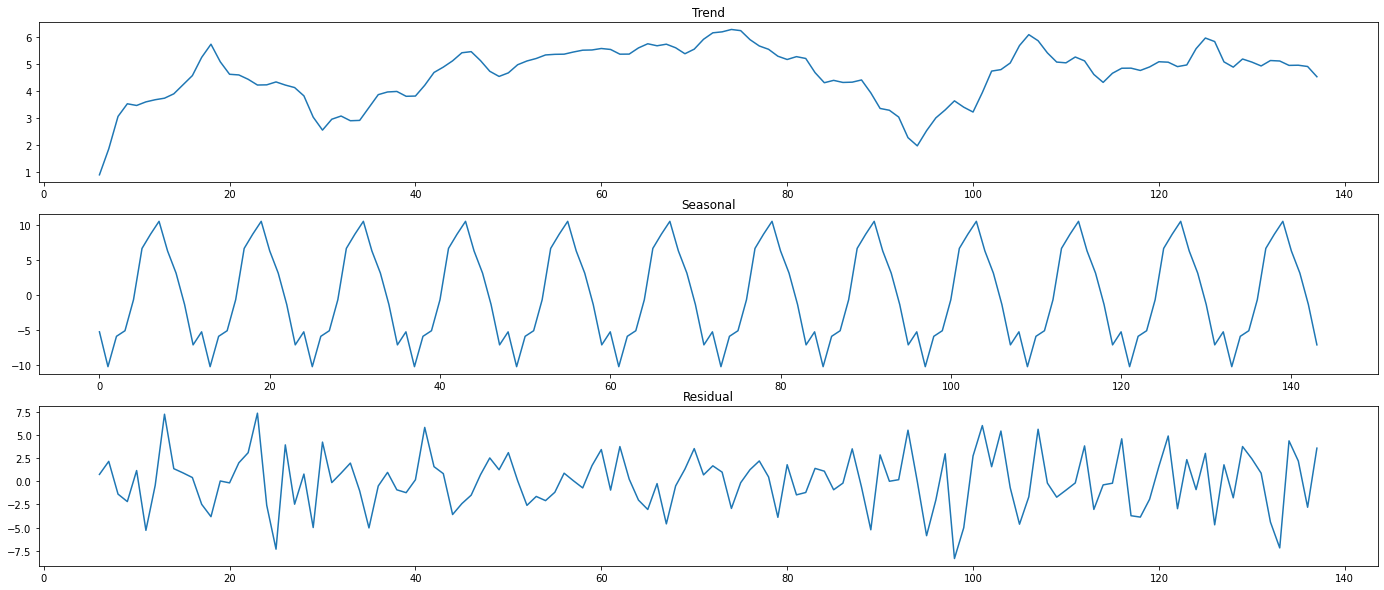

In [43]:
result = seasonal_decompose(df_monthly['Temperatury'], model='additive',freq = 12)

fig, ax = plt.subplots(3, figsize=(24,10))
ax[0].plot(result.trend)
ax[0].set_title('Trend')
ax[1].plot(result.seasonal)
ax[1].set_title('Seasonal')
ax[2].plot(result.resid)
ax[2].set_title('Residual')
plt.show()


# Studio dei parametri d, p , q.

## Studio della stazionarietà

p-value: 0.015392 , d = 0

In [11]:
from statsmodels.tsa.stattools import adfuller

# Eseguiamo il test ADF sulla serie temporale
result = adfuller(df_daily['Temperatury'])

# Stampiamo i risultati del test
print('Risultati test su df_daily \n')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]+'\n')


# Eseguiamo il test ADF sulla serie temporale
result = adfuller(df_monthly['Temperatury'])

# Stampiamo i risultati del test
print('Risultati test su df_monthly\n')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

Risultati test su df_daily 

ADF Statistic: -3.832490
p-value: 0.002592

Risultati test su df_monthly

ADF Statistic: -3.288693
p-value: 0.015392


Autocorrelazione Parziale (PACF)

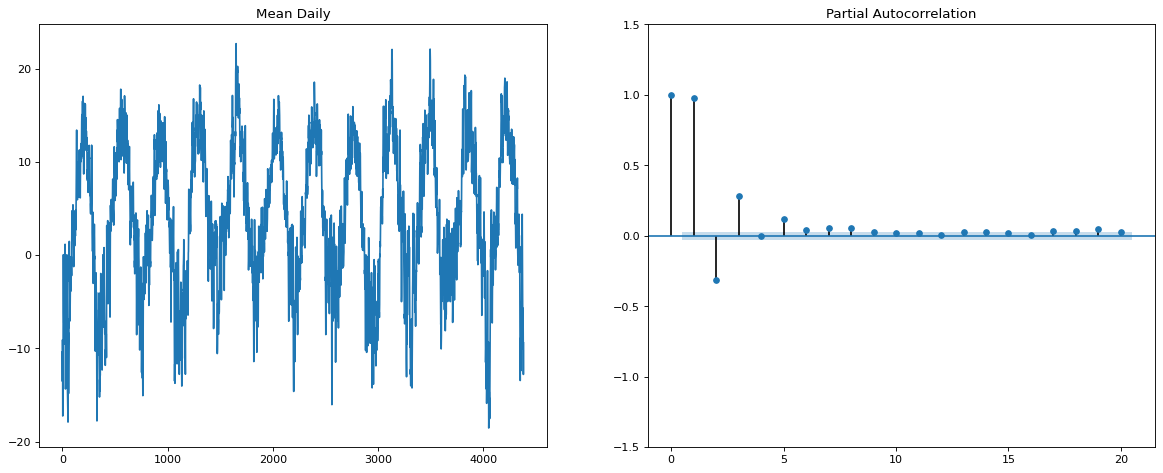

In [12]:
plt.rcParams.update({'figure.figsize':(18,7), 'figure.dpi':80})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_daily['Temperatury'])
axes[0].set_title('Mean Daily')
axes[1].set(ylim=(-1.5,1.5))
plot_pacf(df_daily['Temperatury'], axes[1], lags=20, alpha=0.05)
plt.show()

#Il primo lag non lo prendo in considerazione, il parametro p lo imposto inizialmente pari a 1, in un secondo momento testo il modello con p = 2 per vedere se il modello è piu corretto o meno.

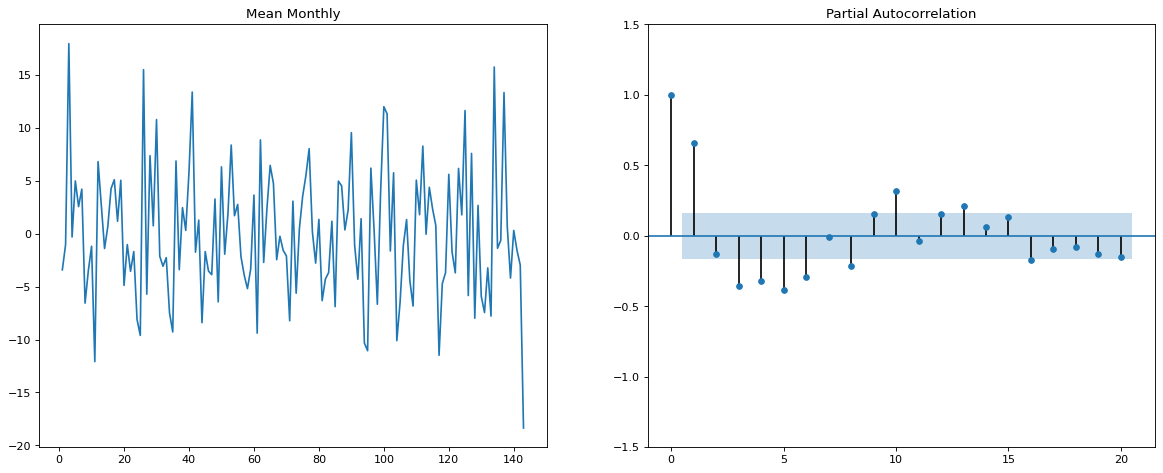

In [22]:
plt.rcParams.update({'figure.figsize':(18,7), 'figure.dpi':80})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_monthly['Temperatury'].diff())
axes[0].set_title('Mean Monthly')
axes[1].set(ylim=(-1.5,1.5))
plot_pacf(df_monthly['Temperatury'], axes[1], lags=20, alpha=0.05)
plt.show()

#In questo caso con il dataset monthly, ho una buona autocorrelazione, imposto il parametro p = 1

Studio Autocorrelazione

In [34]:
print(df_daily)

df_daily_ = df_daily.dropna()

print(df_daily_)

df_daily_diff = df_daily.diff()

print(df_daily_diff)

df_daily_diff = df_daily_diff.dropna()

print(df_daily_diff)

      Temperatury       Date
0      -10.383333 2010-01-01
1      -13.533333 2010-01-02
2       -9.083333 2010-01-03
3      -10.816667 2010-01-04
4      -17.250000 2010-01-05
...           ...        ...
4377    -5.687500 2021-12-26
4378    -8.250000 2021-12-27
4379    -9.875000 2021-12-28
4380   -12.787500 2021-12-29
4381    -9.400000 2021-12-30

[4382 rows x 2 columns]
      Temperatury       Date
0      -10.383333 2010-01-01
1      -13.533333 2010-01-02
2       -9.083333 2010-01-03
3      -10.816667 2010-01-04
4      -17.250000 2010-01-05
...           ...        ...
4377    -5.687500 2021-12-26
4378    -8.250000 2021-12-27
4379    -9.875000 2021-12-28
4380   -12.787500 2021-12-29
4381    -9.400000 2021-12-30

[4382 rows x 2 columns]
      Temperatury   Date
0             NaN    NaT
1       -3.150000 1 days
2        4.450000 1 days
3       -1.733333 1 days
4       -6.433333 1 days
...           ...    ...
4377     1.862500 1 days
4378    -2.562500 1 days
4379    -1.625000 1 days
4380

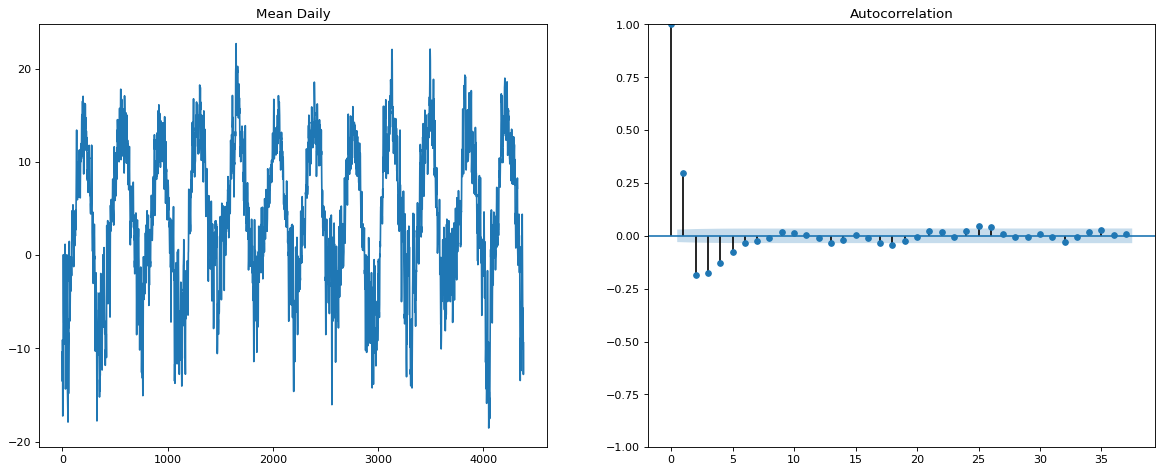

In [20]:
# q = moving average model order - Studio grafico Autocorrelazione (ACF)

plt.rcParams.update({'figure.figsize':(18,7), 'figure.dpi':80})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_daily['Temperatury'])
axes[0].set_title('Mean Daily')
axes[1].set(ylim=(-1,1))
plot_acf(df_daily['Temperatury'].diff().dropna(), axes[1])
plt.show()

#Pongo il parametro Q = 1

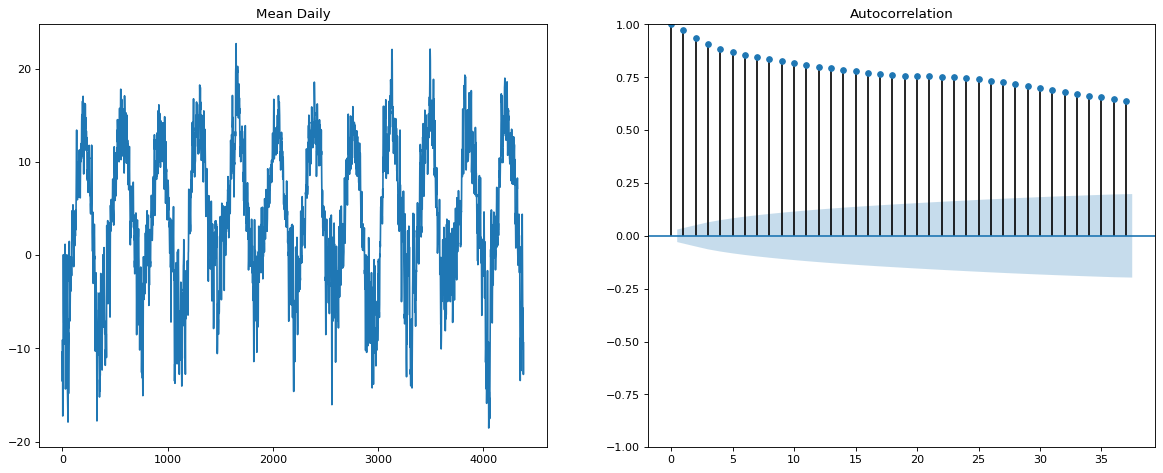

In [29]:
plt.rcParams.update({'figure.figsize':(18,7), 'figure.dpi':80})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_daily['Temperatury'])
axes[0].set_title('Mean Daily')
axes[1].set(ylim=(-1,1))
plot_acf(df_daily['Temperatury'], axes[1])
plt.show()

#WTF?

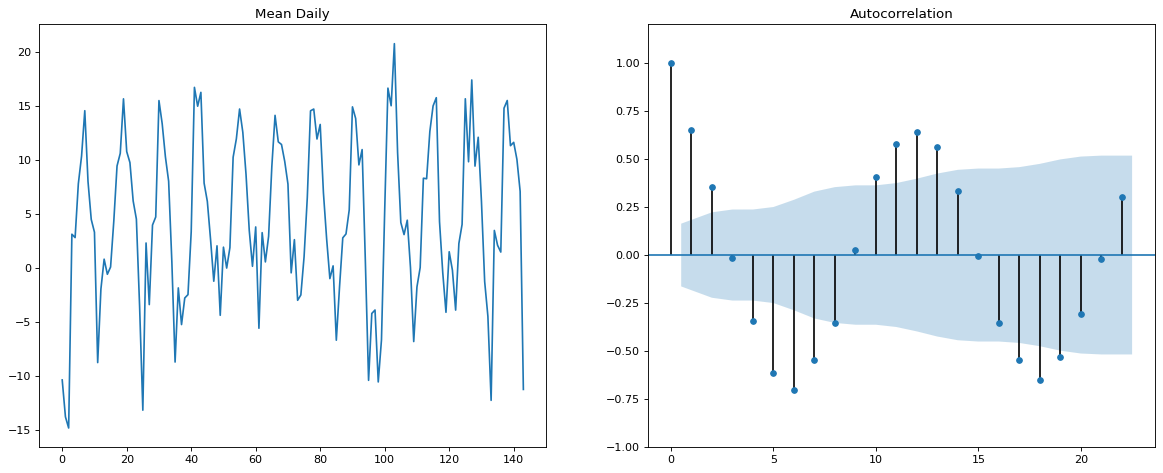

In [31]:

plt.rcParams.update({'figure.figsize':(18,7), 'figure.dpi':80})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_monthly['Temperatury'])
axes[0].set_title('Mean Daily')
axes[1].set(ylim=(-1,1.2))
plot_acf(df_monthly['Temperatury'], axes[1])
plt.show()


#posso impostare il parametro q = 1 ed in un secondo momento fare una prova con q = 2

## Alleno il modello ARIMA

*integration models: ARIMA(p, d, q)*

In [35]:
from statsmodels.tsa.arima_model import ARIMA


##Modello ARIMA MONTHLY 0,0,1
model = ARIMA(df_monthly['Temperatury'], order=(0,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Temperatury   No. Observations:                  144
Model:                     ARMA(0, 1)   Log Likelihood                -467.658
Method:                       css-mle   S.D. of innovations              6.218
Date:                Fri, 27 Jan 2023   AIC                            941.317
Time:                        13:55:00   BIC                            950.226
Sample:                             0   HQIC                           944.937
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2870      0.801      5.350      0.000       2.716       5.858
ma.L1.Temperatury     0.5501      0.059      9.374      0.000       0.435       0.665
                        

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [45]:
##Modello ARIMA MONTHLY 1,0,1
model = ARIMA(df_monthly['Temperatury'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Temperatury   No. Observations:                  144
Model:                     ARMA(1, 1)   Log Likelihood                -453.860
Method:                       css-mle   S.D. of innovations              5.644
Date:                Fri, 27 Jan 2023   AIC                            915.719
Time:                        14:00:59   BIC                            927.599
Sample:                             0   HQIC                           920.546
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0010      1.392      2.874      0.004       1.273       6.729
ar.L1.Temperatury     0.6270      0.086      7.324      0.000       0.459       0.795
ma.L1.Temperatury     0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [46]:
##Modello ARIMA MONTHLY 1,0,2
model = ARIMA(df_monthly['Temperatury'], order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Temperatury   No. Observations:                  144
Model:                     ARMA(1, 2)   Log Likelihood                -465.357
Method:                       css-mle   S.D. of innovations              6.073
Date:                Fri, 27 Jan 2023   AIC                            940.714
Time:                        14:01:25   BIC                            955.563
Sample:                             0   HQIC                           946.748
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5911      0.152     30.297      0.000       4.294       4.888
ar.L1.Temperatury     0.8891      0.050     17.807      0.000       0.791       0.987
ma.L1.Temperatury    -0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [48]:
##Modello ARIMA MONTHLY 1,0,1
model = ARIMA(df_daily['Temperatury'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            Temperatury   No. Observations:                 4382
Model:                     ARMA(1, 1)   Log Likelihood               -8162.061
Method:                       css-mle   S.D. of innovations              1.558
Date:                Fri, 27 Jan 2023   AIC                          16332.121
Time:                        14:01:52   BIC                          16357.662
Sample:                             0   HQIC                         16341.133
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0484      0.789      5.128      0.000       2.501       5.596
ar.L1.Temperatury     0.9564      0.004    212.656      0.000       0.948       0.965
ma.L1.Temperatury     0.

In [50]:
##Modello ARIMA MONTHLY 2,0,1
model = ARIMA(df_monthly['Temperatury'], order=(2,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            Temperatury   No. Observations:                  144
Model:                     ARMA(2, 1)   Log Likelihood                -432.478
Method:                       css-mle   S.D. of innovations              4.841
Date:                Fri, 27 Jan 2023   AIC                            874.956
Time:                        14:02:16   BIC                            889.806
Sample:                             0   HQIC                           880.990
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5479      0.232     19.609      0.000       4.093       5.002
ar.L1.Temperatury     1.5566      0.056     28.012      0.000       1.448       1.666
ar.L2.Temperatury    -0.

In [44]:
##Modello ARIMA MONTHLY 1,0,1
model = ARIMA(df_monthly['Temperatury'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Temperatury   No. Observations:                  144
Model:                     ARMA(1, 1)   Log Likelihood                -453.860
Method:                       css-mle   S.D. of innovations              5.644
Date:                Fri, 27 Jan 2023   AIC                            915.719
Time:                        13:59:14   BIC                            927.599
Sample:                             0   HQIC                           920.546
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0010      1.392      2.874      0.004       1.273       6.729
ar.L1.Temperatury     0.6270      0.086      7.324      0.000       0.459       0.795
ma.L1.Temperatury     0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


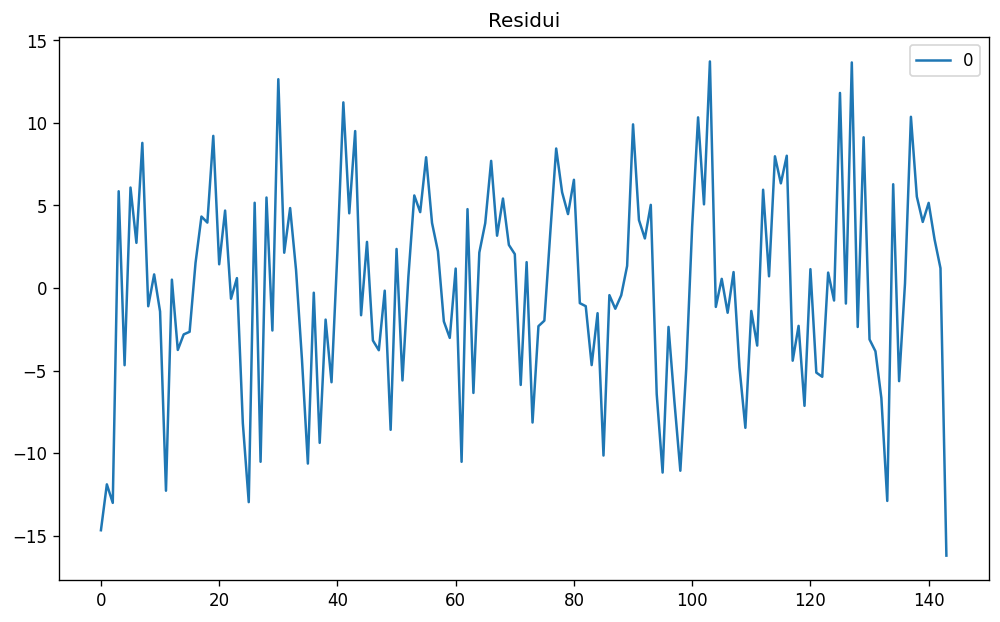

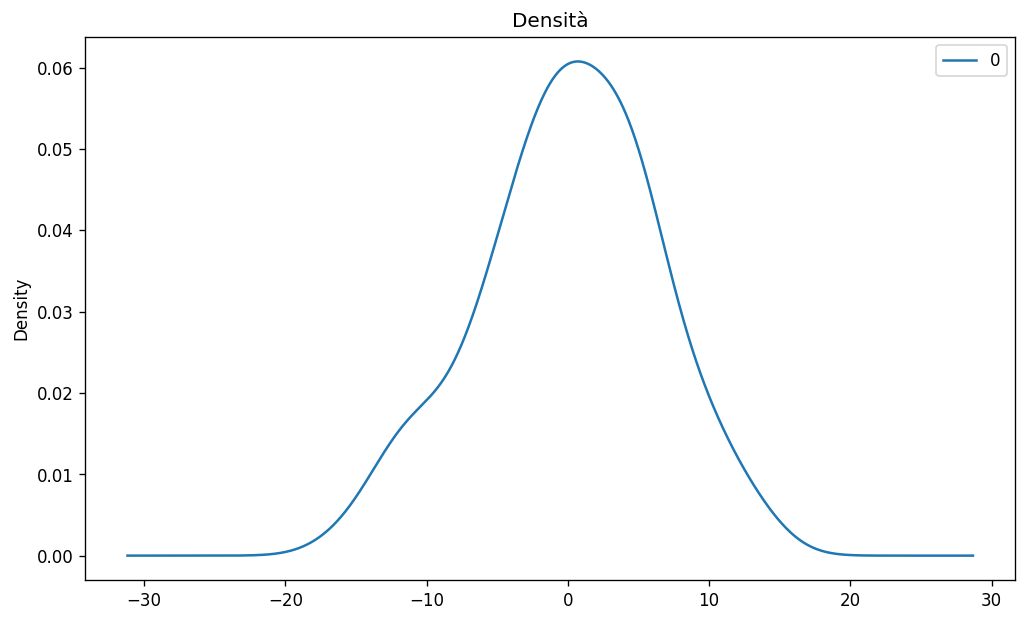

In [38]:

plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residui')
plt.show()
residuals.plot(kind='kde', title='Densità')
plt.show()


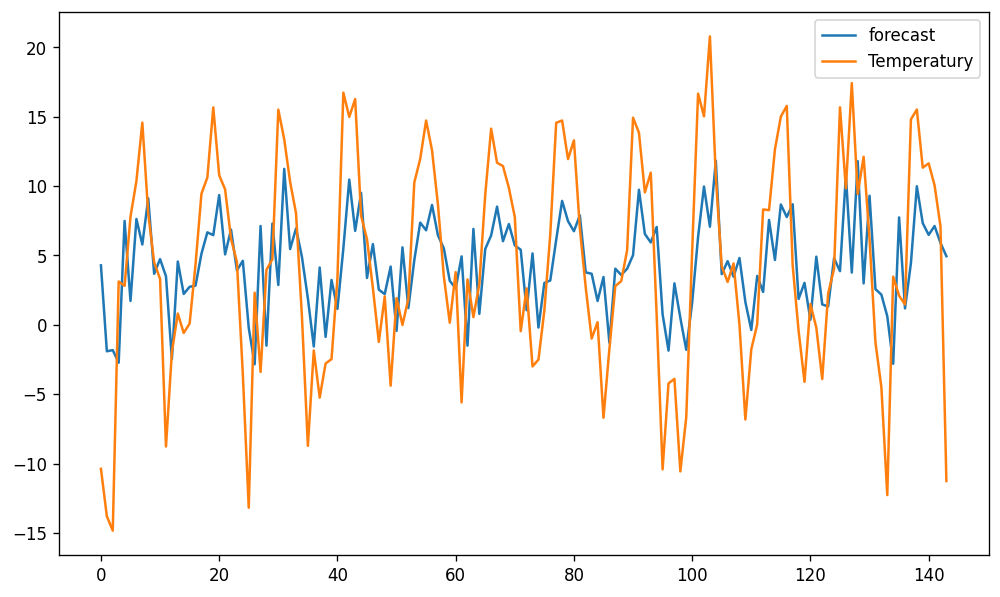

In [42]:
model_fit.plot_predict(dynamic = False)
plt.show()